In [1]:
train_time = 1
param_num = 454948
comm_bandwidth = 10 * 1024**2 /8  # k * 1024**2 /8 => k Mb/s 
comm_time = param_num * 4 / comm_bandwidth
fwdgrad_time_per_round = train_time*15 + comm_time*15
fedsgd_time_per_round = train_time*8*15 + comm_time*15*2
fedavg_time_per_round = train_time*8*15 + comm_time*1*2
fwdgrad_time_per_round /= 60
fedsgd_time_per_round /= 60
fedavg_time_per_round /= 60
method_round_time = [fedavg_time_per_round,fedsgd_time_per_round,fwdgrad_time_per_round]

[2000, 2000, 2000, 2000, 2000]
[2000, 2000, 2000, 2000, 2000]
[2000, 179.12933349609375, 229.8826446533203, 2000, 2000]


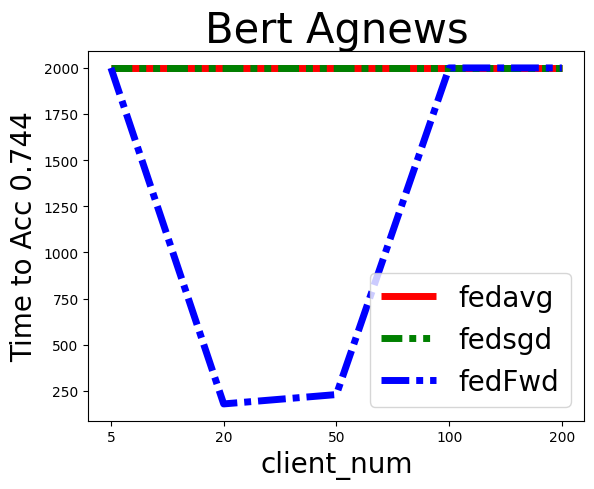

In [8]:
import matplotlib.pyplot as plt
import numpy as np

linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 5
client_num_list = [5,20,50,100,200]
method_list = ["fedavg","fedsgd","fedFwd"]
model_list = ["bert"]
learning_rate_list = ["0.001"]
target_acc = 0.744
for model in model_list:
    # plt.figure(figsize=(30, 30),dpi=100)
    for method_id,method in enumerate(method_list):
        time_to_acc_list = []
        for client_num in client_num_list:
            with open(f"{method}_{model}_agnews_lr0.001_client_num_{client_num}.log","r") as f:
                log = f.readlines()
                achive_target = False
                round = 0
                for l in log:
                    if "'acc':" in l:
                        round += 1
                        acc=float(l[l.rfind("'acc':")+7:l.rfind(",")])
                        if acc >= target_acc:
                            time_to_acc_list.append(round*method_round_time[method_id])
                            achive_target = True
                            break
                if not achive_target:
                    time_to_acc_list.append(2000)
        print(time_to_acc_list)
        plt.plot(range(len(client_num_list)),time_to_acc_list,linestyle=linestyle[method_id], color=colors[method_id],label=f"{method}",linewidth=lw)
                    
        plt.xlabel("client_num",fontsize=20)
        plt.ylabel(f"Time to Acc {target_acc}",fontsize=20)
        # plt.xticks(size = 20)
        # plt.xlim(0,500)
        # plt.yticks(size = 20)
        # plt.ylim(0.2,0.92)
        plt.xticks(range(len(client_num_list)),client_num_list)
        plt.legend(fontsize=20)
        plt.title(f"Bert Agnews",fontsize=30)
    plt.show()
        # plt.savefig(f"./{model}_{method}.pdf")


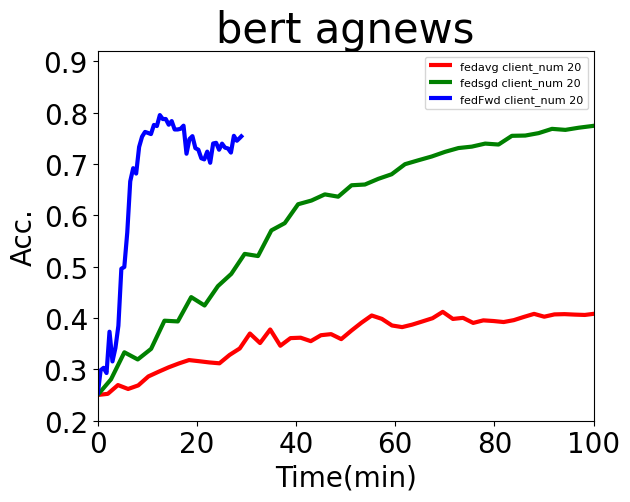

In [3]:
import matplotlib.pyplot as plt
import numpy as np

linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3
num_client_list = [20]
method_list = ["fedavg","fedsgd","fedFwd"]
model_list = ["bert"]
# normal_method_list = ["kaiming_normal", "xavier_normal"]
learning_rate_list = ["0.001"]
for model in model_list:
    # for method in normal_method_list:
    # k = 1
    # plt.figure(figsize=(30, 6),dpi=100)
    for method_id,method in enumerate(method_list):
        acc_lists = []
        for i,client_num in enumerate(num_client_list):
            acc = []
            with open(f"{method}_{model}_agnews_lr0.001_client_num_{client_num}.log","r") as f:
                log = f.readlines()
                for l in log:
                    if "'acc':" in l:
                        acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                    # if len(acc)>200:
                    #     break
            plt.plot([t*method_round_time[method_id] for t in range(len(acc))], acc, linestyle=linestyle[i], color=colors[method_id],label=f"{method} client_num {client_num}",linewidth=lw)

        plt.xlabel("Time(min)",fontsize=20)
        plt.ylabel("Acc.",fontsize=20)
        plt.xticks(size = 20)
        plt.xlim(0,100)
        plt.yticks(size = 20)
        plt.ylim(0.2,0.92)
        plt.legend(fontsize=8)
        plt.title(f"bert agnews",fontsize=30)
    plt.show()
        # plt.savefig(f"./{model}_{method}.pdf")
